In [52]:
#-----------------------------------------------------------------------------------------------------------
import sys
import warnings
warnings.filterwarnings("ignore")
import time as t
import datetime
from datetime import datetime, timedelta, date 
from dateutil.relativedelta import *
from netCDF4 import Dataset   
import glob
import requests 
import pandas as pd
import xarray as xr
import requests 
import functools
import operator
import wget
import os
import gc
import numpy as np
import pygrib

from sklearn.linear_model import LinearRegression
from scipy import signal
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
import xarray as xr
from scipy.interpolate import griddata


import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import shapefile
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
import cartopy, cartopy.crs as ccrs   
import regionmask
from shapely.geometry import Point, Polygon

from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker 
import scipy.ndimage as ndimage
from PIL import Image
from glob import glob

import matplotlib.colors as colors
import matplotlib

import urllib.request
from metpy.units import units

import time as t
from datetime import datetime, timedelta, date 
import datetime
#-----METPY---------------------
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.interpolate import cross_section
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [53]:


# Download data

#Loop para dados 
rodadas = []
#atual
# data_atual = datetime.datetime.strptime(sys.argv[1], '%Y-%m-%d')
data_atual = datetime.datetime.now().date()
for i in range(7):

    data = data_atual - datetime.timedelta(days=i)
    
    # horários 
    for hora in [0]:
        data_hora = datetime.datetime.combine(data, datetime.time(hora))
        data_hora = data_hora.strftime('%Y%m%d')
        rodadas.append(data_hora)
     


print(rodadas) 


['20230726', '20230725', '20230724', '20230723', '20230722', '20230721', '20230720']


In [54]:

# print('------------------------------------')
# print(' Download Data ')
# print('------------------------------------')

# rodadas
# rodada = '00' 
# membros = ['01']



# for d in rodadas:

#     for membro in membros:
#         #  
#         path = f"https://ftp.ncep.noaa.gov/data/nccf/com/cfs/prod/cfs.{d}/{rodada}/time_grib_{membro}/psi200.{membro}.{d}{rodada}.daily.grb2"
#         # Nome do arquivo para salvar
#         filename = f"/mnt/c/scripts/temas/stream_plot/psi_200/anomalia/psi200_{membro}_{d}{rodada}.grb2"
#         # Baixar o arquivo usando a biblioteca urllib.request
#         urllib.request.urlretrieve(path, filename)
#         print(f"Arquivo {filename} baixado")




------------------------------------
 Download Data 
------------------------------------


KeyboardInterrupt: 

In [55]:
#Dados da previsão
files= glob('/mnt/c/scripts/temas/stream_plot/psi_200/anomalia/psi200_01_*.grb2')
li = sorted(files)
li

['/mnt/c/scripts/temas/stream_plot/psi_200/anomalia/psi200_01_2023072000.grb2',
 '/mnt/c/scripts/temas/stream_plot/psi_200/anomalia/psi200_01_2023072100.grb2',
 '/mnt/c/scripts/temas/stream_plot/psi_200/anomalia/psi200_01_2023072200.grb2',
 '/mnt/c/scripts/temas/stream_plot/psi_200/anomalia/psi200_01_2023072300.grb2',
 '/mnt/c/scripts/temas/stream_plot/psi_200/anomalia/psi200_01_2023072400.grb2',
 '/mnt/c/scripts/temas/stream_plot/psi_200/anomalia/psi200_01_2023072500.grb2',
 '/mnt/c/scripts/temas/stream_plot/psi_200/anomalia/psi200_01_2023072600.grb2']

In [56]:
# dataset = xr.open_dataset(li[3])
# dataset

In [57]:
data_list = []
# Loop 
for q in li:
   
    dataset = xr.open_dataset(q)
#     dataset = dataset.assign_coords({'number':1})

    dataset = dataset.swap_dims({"step": "valid_time"}).drop(['step']) 

    strf = dataset['strf'] #separar cada arquivo pelo start_time

    data_list.append(strf)

Ignoring index file '/mnt/c/scripts/temas/stream_plot/psi_200/anomalia/psi200_01_2023072600.grb2.923a8.idx' older than GRIB file
skipping corrupted Message
Traceback (most recent call last):
  File "/home/laiz/miniconda3/envs/env2/lib/python3.11/site-packages/cfgrib/messages.py", line 273, in itervalues
    yield self.filestream.message_from_file(file, errors=errors)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/laiz/miniconda3/envs/env2/lib/python3.11/site-packages/cfgrib/messages.py", line 340, in message_from_file
    return Message.from_file(file, offset, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/laiz/miniconda3/envs/env2/lib/python3.11/site-packages/cfgrib/messages.py", line 96, in from_file
    codes_id = eccodes.codes_grib_new_from_file(file)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/laiz/miniconda3/envs/env2/lib/python3.11/site-packages/gribapi/gribapi.py", line 413, in grib_new_from_f

In [58]:
files_prev = xr.combine_nested(data_list,concat_dim=['time'],join='inner') #innner entre as previsões, selecionando valid_time apenas em comum 

files_prev['valid_time'] = files_prev.valid_time.dt.month #Converte valid_time em mês

files_prev = files_prev.rename({'valid_time':'month'})

lat_slice = slice(20,-90)
files_prev = files_prev.sel(latitude=lat_slice)


files_prev.coords['longitude'] = (files_prev.coords['longitude'] + 180) % 360 - 180 
files_prev = files_prev.sortby(files_prev.longitude)

files_prev

<xarray.DataArray 'strf' (time: 7, month: 27, latitude: 111, longitude: 360)>
array([[[[-3.9080e+07, -3.7420e+07, -3.5940e+07, ..., -4.3840e+07,
          -4.2410e+07, -4.0790e+07],
         [-3.6840e+07, -3.5170e+07, -3.3740e+07, ..., -4.2090e+07,
          -4.0470e+07, -3.8670e+07],
         [-3.4820e+07, -3.3290e+07, -3.2060e+07, ..., -4.0110e+07,
          -3.8400e+07, -3.6580e+07],
         ...,
         [ 1.6506e+08,  1.6502e+08,  1.6499e+08, ...,  1.6516e+08,
           1.6513e+08,  1.6509e+08],
         [ 1.6484e+08,  1.6482e+08,  1.6480e+08, ...,  1.6488e+08,
           1.6487e+08,  1.6485e+08],
         [ 1.6449e+08,  1.6449e+08,  1.6449e+08, ...,  1.6449e+08,
           1.6449e+08,  1.6449e+08]],

        [[-4.2010e+07, -4.0320e+07, -3.8800e+07, ..., -4.7470e+07,
          -4.5740e+07, -4.3860e+07],
         [-3.9740e+07, -3.8070e+07, -3.6610e+07, ..., -4.5520e+07,
          -4.3620e+07, -4.1630e+07],
         [-3.7580e+07, -3.5960e+07, -3.4570e+07, ..., -4.3380e+07,
          -4.1420e+07, -3.9430e+07],
...
         [ 1.7625e+08,  1.7620e+08,  1.7615e+08, ...,  1.7641e+08,
           1.7636e+08,  1.7631e+08],
         [ 1.7610e+08,  1.7607e+08,  1.7605e+08, ...,  1.7617e+08,
           1.7615e+08,  1.7612e+08],
         [ 1.7593e+08,  1.7593e+08,  1.7593e+08, ...,  1.7593e+08,
           1.7593e+08,  1.7593e+08]],

        [[-3.2100e+07, -3.2870e+07, -3.3670e+07, ..., -3.0190e+07,
          -3.0800e+07, -3.1420e+07],
         [-2.9360e+07, -3.0110e+07, -3.0880e+07, ..., -2.7460e+07,
          -2.8050e+07, -2.8670e+07],
         [-2.6610e+07, -2.7340e+07, -2.8060e+07, ..., -2.4750e+07,
          -2.5310e+07, -2.5930e+07],
         ...,
         [ 1.7512e+08,  1.7507e+08,  1.7503e+08, ...,  1.7526e+08,
           1.7522e+08,  1.7517e+08],
         [ 1.7454e+08,  1.7451e+08,  1.7449e+08, ...,  1.7461e+08,
           1.7458e+08,  1.7456e+08],
         [ 1.7411e+08,  1.7411e+08,  1.7411e+08, ...,  1.7411e+08,
           1.7411e+08,  1.7411e+08]]]], dtype=float32)
Coordinates:
  * latitude       (latitude) float64 20.0 19.0 18.0 17.0 ... -88.0 -89.0 -90.0
  * longitude      (longitude) float64 -180.0 -179.0 -178.0 ... 178.0 179.0
  * month          (month) int64 7 7 7 7 7 7 7 7 7 7 7 ... 7 7 7 7 7 7 7 8 8 8 8
  * time           (time) datetime64[ns] 2023-07-20 2023-07-21 ... 2023-07-26
    isobaricInhPa  float64 200.0

In [59]:
# Média entre os arquivos e a média mensal 

ds_mean = files_prev.mean(dim='time')

ensemble = ds_mean.groupby('month').mean()

In [60]:
#Climatologia 
clima = xr.open_dataset('/mnt/c/scripts/temas/stream_plot/psi_200/climatologia_psi_200.grb2')
lat_slice = slice(20,-90)
clima = clima.sel(latitude=lat_slice)


clima.coords['longitude'] = (clima.coords['longitude'] + 180) % 360 - 180 
clima = clima.sortby(clima.longitude)

clima

<xarray.Dataset>
Dimensions:        (latitude: 45, longitude: 144, month: 12)
Coordinates:
    isobaricInhPa  float64 ...
  * latitude       (latitude) float64 20.0 17.5 15.0 12.5 ... -85.0 -87.5 -90.0
  * longitude      (longitude) float64 -180.0 -177.5 -175.0 ... 175.0 177.5
  * month          (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    strf           (month, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2023-07-25T10:42 GRIB to CDM+CF via cfgrib-0.9.1...

In [61]:
#interpolação 
ensemble = ensemble.interp(longitude=clima.longitude,latitude=clima.latitude)


In [64]:
clima.strf.values

array([[[ 1.30050340e+07,  1.08559020e+07,  8.61593300e+06, ...,
          1.87557000e+07,  1.69563660e+07,  1.50405660e+07],
        [ 1.73448340e+07,  1.53841340e+07,  1.33343340e+07, ...,
          2.25997680e+07,  2.09551980e+07,  1.92036020e+07],
        [ 1.99845020e+07,  1.82691340e+07,  1.64598680e+07, ...,
          2.45224340e+07,  2.31168340e+07,  2.16028300e+07],
        ...,
        [ 1.32399496e+08,  1.32385224e+08,  1.32369720e+08, ...,
          1.32434400e+08,  1.32424320e+08,  1.32412632e+08],
        [ 1.32456272e+08,  1.32452104e+08,  1.32447216e+08, ...,
          1.32464968e+08,  1.32462616e+08,  1.32459688e+08],
        [ 1.32309472e+08,  1.32309472e+08,  1.32309472e+08, ...,
          1.32309472e+08,  1.32309472e+08,  1.32309472e+08]],

       [[ 1.33126330e+07,  1.13396020e+07,  9.24156600e+06, ...,
          1.84046000e+07,  1.68416000e+07,  1.51464340e+07],
        [ 1.82267980e+07,  1.63623990e+07,  1.43950020e+07, ...,
          2.30682940e+07,  2.15881640e

In [65]:
ensemble.values

array([[[-4.14313000e+07, -4.10267700e+07, -4.05305000e+07, ...,
         -4.14353120e+07, -4.16875760e+07, -4.16736660e+07],
        [-3.45827920e+07, -3.36764595e+07, -3.27913660e+07, ...,
         -3.66541140e+07, -3.61675460e+07, -3.54413350e+07],
        [-2.89311800e+07, -2.79248450e+07, -2.69863960e+07, ...,
         -3.18811500e+07, -3.09999380e+07, -2.99715540e+07],
        ...,
        [ 1.75421040e+08,  1.75355112e+08,  1.75286944e+08, ...,
          1.75606448e+08,  1.75547264e+08,  1.75485336e+08],
        [ 1.75169840e+08,  1.75146488e+08,  1.75121856e+08, ...,
          1.75230008e+08,  1.75211552e+08,  1.75191504e+08],
        [ 1.74442976e+08,  1.74442976e+08,  1.74442976e+08, ...,
          1.74442976e+08,  1.74442976e+08,  1.74442976e+08]],

       [[-3.76150000e+07, -3.77955340e+07, -3.77764280e+07, ...,
         -3.68150020e+07, -3.70264280e+07, -3.73248240e+07],
        [-3.02044650e+07, -2.99795535e+07, -2.96942860e+07, ...,
         -3.05995535e+07, -3.04708920e

In [66]:
# Anomalia para o mês de agosto 


e = ensemble.sel(month=8)
c = clima.sel(month=8).strf

In [67]:
df = e - c
df

<xarray.DataArray 'strf' (latitude: 45, longitude: 144)>
array([[-10545904. , -10794606. , -11105964. , ..., -10770872. ,
        -10478396. , -10421156. ],
       [ -5251435. ,  -5423621.5,  -5734386. , ...,  -5641589.5,
         -5340822. ,  -5236500.5],
       [ -1249174. ,  -1501798. ,  -1826702. , ...,  -1346048. ,
         -1163162. ,  -1135823. ],
       ...,
       [ 20803776. ,  20688184. ,  20579456. , ...,  21176160. ,
         21048784. ,  20923608. ],
       [ 21790192. ,  21753708. ,  21716736. , ...,  21913088. ,
         21870768. ,  21829892. ],
       [ 22115008. ,  22115008. ,  22115008. , ...,  22115008. ,
         22115008. ,  22115008. ]])
Coordinates:
    isobaricInhPa  float64 200.0
    month          int64 8
  * longitude      (longitude) float64 -180.0 -177.5 -175.0 ... 175.0 177.5
  * latitude       (latitude) float64 20.0 17.5 15.0 12.5 ... -85.0 -87.5 -90.0

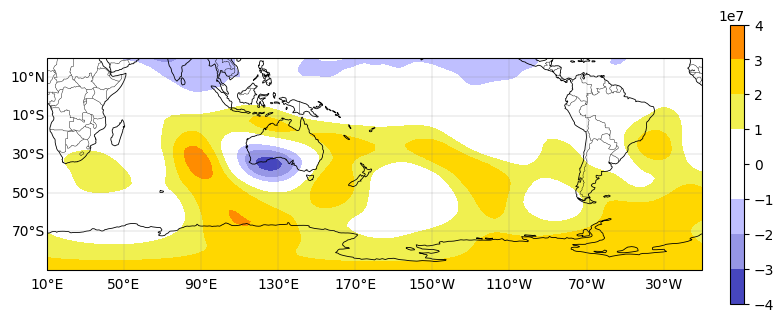

In [69]:
lats = 20
latn = -110
lon1 = 160  
lon2 = -180   

plt.figure(figsize=[9,6])                            

proj = ccrs.PlateCarree(central_longitude=190)    

ax = plt.axes(projection=proj)   

ax.set_extent([lon1, lon2, lats, latn], proj)  

ax.coastlines( color='black',linewidth=0.6)

ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.3)


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
                  xlocs=np.arange(-150,180,40), ylocs=np.arange(-90, 40,20), 
                  x_inline=False, y_inline=False, linewidth=0.33, color='gray',alpha=0.5)



colors = ['#4646be','#9696e6','#aaaaf2','#bfbfff','#ffffff','#ffffff','#f0f050','#ffff00','#ffd700', '#ff8c00']
            

cmap = matplotlib.colors.ListedColormap(colors)

cmap.set_over('#663800')
cmap.set_under('#23235f')

    
cf = ax.contourf(df.longitude,df.latitude, df, cmap=cmap)
cb2=plt.colorbar(cf,fraction=0.02, pad=0.04)



gl.right_labels = False
gl.top_labels = False


In [80]:
#testando para um ponto 

print('ensemble:',e.sel(latitude = -23.60, longitude = 313.33, method = 'nearest').values*1e-7)
print('clima:',c.sel(latitude = -23.70, longitude = 313.33, method = 'nearest').values*1e-7)
print('diferença:',df.sel(latitude = -23.70, longitude = 313.33, method = 'nearest').values*1e-7)


ensemble: -2.0367857
clima: -1.7716934
diferença: -0.2650923


In [82]:
-2.0367857 - -1.7716934

-0.26509229999999984